from
https://github.com/keras-team/keras/blob/v2.15.0/keras/datasets/fashion_mnist.py#L28-L111

  License:
      The copyright for Fashion-MNIST is held by Zalando SE.
      Fashion-MNIST is licensed under the [MIT license](
      https://github.com/zalandoresearch/fashion-mnist/blob/master/LICENSE).

Base code https://gatesboltonanalytics.com/?page_id=898 on CIFAR 10 image data set.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


<class 'numpy.ndarray'>
(60000, 28, 28)


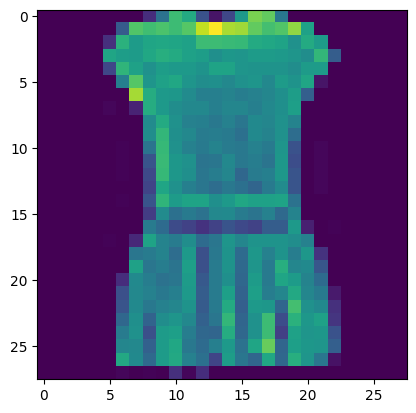

In [ ]:
print(type(train_images))
print(train_images.shape)
plt.imshow(train_images[3])

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
input_shape=train_images.shape
print("The input shape for the training images is\n", input_shape)
print("The input shape per image is\n", input_shape[1:])
#color_channels refers to (R,G,B)
print("A single image, R of RGB, has a matrix like this:\n", train_images[0,:,0])
print("A single image has shape\n", train_images[0,:,0].shape)
print(train_images[0,:,2].shape)

The input shape for the training images is
 (60000, 28, 28)
The input shape per image is
 (28, 28)
A single image, R of RGB, has a matrix like this:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3 98 75 48  0  0
  2  0  0  0]
A single image has shape
 (28,)
(28,)


# Principal Component Analysis

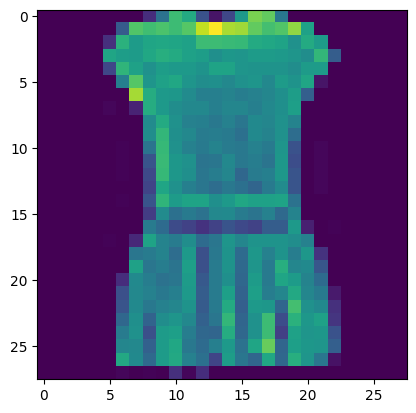

Shape of train_images after PCA: (60000, 2)


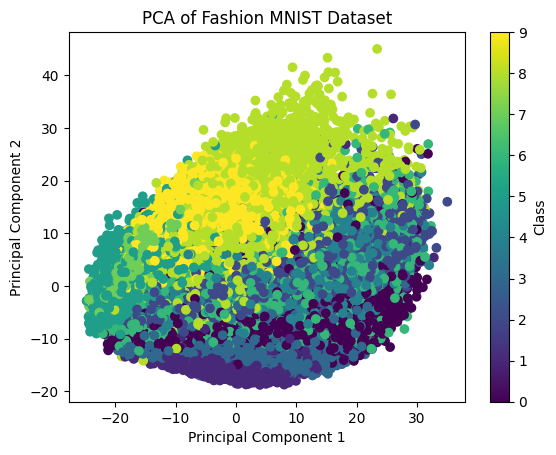

In [ ]:

# Visualize an example image
plt.imshow(train_images[3])
plt.show()

# Preprocess the data for PCA
# Reshape the 28x28 images into vectors of length 784
train_images_flat = train_images.reshape(train_images.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)

# Perform PCA
pca = PCA(n_components=2)  # Number of principal components to keep
train_images_pca = pca.fit_transform(train_images_scaled)

# Check the shape of the transformed data
print("Shape of train_images after PCA:", train_images_pca.shape)

# Plot the transformed data
plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels, cmap='viridis')
plt.title('PCA of Fashion MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()


The scatter plot shows the distribution of the dataset along the first two principal components which are often the ones that capture the most variance within the data.

The colors in the scatter plot represent different classes, indicated by the color bar on the right side. The color bar suggests there are 10 classes (0-9), which is typical for the Fashion MNIST dataset, where each class corresponds to a different type of fashion item, such as T-shirts/tops, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.

The overlap of colors in the plot indicates that while PCA does provide some separation of the classes, there is still a significant amount of overlap, which implies that these two principal components alone may not be sufficient to completely separate the different types of fashion items. This might suggest the need for additional dimensions for better class separation or the use of more complex models for classification.

# Discretization

Shape of discretized training images: (60000, 784)


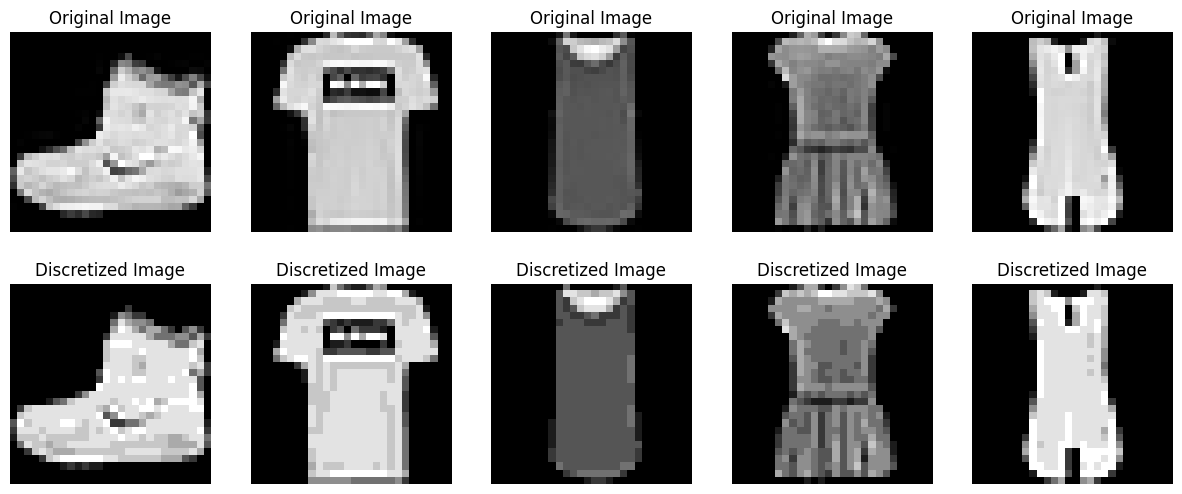

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from keras.datasets import fashion_mnist

# Flatten the images for discretization
train_images_flat = train_images.reshape(train_images.shape[0], -1)

# Discretize the pixel values using KBinsDiscretizer
n_bins = 10  # Number of bins for discretization
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
train_images_discretized = discretizer.fit_transform(train_images_flat)

# Check the shape of the discretized data
print("Shape of discretized training images:", train_images_discretized.shape)

# Visualize the original and discretized images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axs[0, i].imshow(train_images[i], cmap='gray')
    axs[0, i].set_title("Original Image")
    axs[0, i].axis('off')
    axs[1, i].imshow(train_images_discretized[i].reshape(28, 28), cmap='gray')
    axs[1, i].set_title("Discretized Image")
    axs[1, i].axis('off')

plt.show()

The top row shows the original images, which are grayscale with varying intensities of pixels representing different clothing items. Below each original image is the "Discretized Image." Discretization in image processing typically refers to the process of transforming continuous gray levels into discrete levels. This could mean reducing the number of gray levels to simplify the image, which often makes it easier to process for certain types of algorithms, especially when computational simplicity is desired or when the data is to be used for educational purposes.

The discretized images have fewer gray levels, which can be observed by the more 'blocky' appearance and less subtle transitions between shades. This type of image simplification can help in reducing the complexity of the data for algorithms that might not require the full detail of the original image or where the essential information is retained even in a less detailed version.

The text "Shape of discretized training images: (60000, 784)" suggests that the dataset contains 60,000 training images, and each image has been flattened into a 784-dimensional vector (since 28 multiplied by 28 equals 784), which is a common practice when preparing images for input into a machine learning model, especially when working with methods that expect 1D feature vectors.

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['	T-shirt/top', 'Trouser', 'Pullover', '	Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


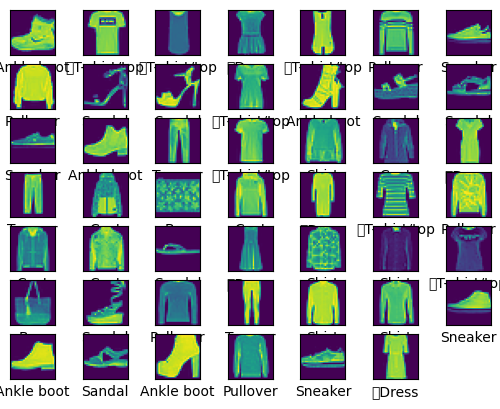

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt

# Change the range to 48 to match the number of images
for i in range(48):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The MNIST labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
input_shape = (None, 28, 28, 1)

# Convolutional Neural Network

Convolutional Neural Networks (CNNs) are a class of neural networks particularly effective for processing visual and spatial data such as images. They are characterized by their unique architecture, consisting of three main types of layers:

Convolutional Layer: The convolutional layer is the core building block of CNNs. It applies convolutional operations to the input data, which involves sliding a set of learnable filters (kernels) across the input image to extract features. These filters help detect patterns, edges, and other features present in the input image.

Pooling Layer: The pooling layer is used to downsample the feature maps obtained from the convolutional layers. Common pooling operations include max pooling and average pooling, which reduce the spatial dimensions of the feature maps while retaining the most important information. Pooling helps make the representation invariant to small translations and distortions in the input data, while also reducing the computational load.

Fully-Connected (FC) Layer: The fully-connected layer is typically located at the end of the CNN architecture. It consists of densely connected neurons, similar to those in traditional neural networks. The purpose of the fully-connected layer is to perform classification or regression based on the high-level features extracted by the preceding convolutional and pooling layers. It takes the flattened output of the preceding layers and produces the final output predictions.

CNNs leverage the hierarchical structure of these layers to progressively extract and learn complex features from the input data. The convolutional layers capture low-level features such as edges and textures, while deeper layers capture higher-level features and patterns relevant to the task at hand. By combining convolutional, pooling, and fully-connected layers, CNNs are capable of achieving state-of-the-art performance on various visual recognition tasks, including image classification, object detection, and image segmentation.

https://www.ibm.com/topics/convolutional-neural-networks




In [ ]:
CNN_Model = tf.keras.models.Sequential([
    #https://keras.io/api/layers/convolution_layers/convolution2d/
  tf.keras.layers.Conv2D(input_shape=input_shape[1:], kernel_size=(3,3), filters=32, activation="relu"),
  ## A CNN takes tensors of shape (image_height, image_width, color_channels)
        ## input_shape[1:] means all but the first value. Here, our input is: ()
        ## https://www.tensorflow.org/api_docs/python/tf/keras/activations
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  #https://keras.io/api/layers/pooling_layers/max_pooling2d/
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  #tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

     tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(64, activation='relu'),
  ## https://keras.io/api/layers/core_layers/dense/
  ## https://www.tutorialspoint.com/keras/keras_dense_layer.htm

  tf.keras.layers.Dense(10)
])

In [ ]:

CNN_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

Layers:

Convolutional Layers (Conv2D): The model has two convolutional layers (conv2d_2 and conv2d_3). These layers perform feature extraction by applying convolution operations to the input images. The output shape of the first convolutional layer is (None, 26, 26, 32), indicating that it has 32 filters of size 3x3. Similarly, the output shape of the second convolutional layer is (None, 11, 11, 64), indicating 64 filters of size 3x3.

Pooling Layers (MaxPooling2D): After each convolutional layer, there's a max-pooling layer (max_pooling2d_2 and max_pooling2d_3). Max-pooling reduces the spatial dimensions of the feature maps while retaining the most important information. For example, the output shape after the first max-pooling layer is (None, 13, 13, 32).

Flatten Layer: After the convolutional and pooling layers, there's a flatten layer (flatten_1) which converts the 2D feature maps into a 1D vector, ready for input to the dense layers.

Dense Layers (Fully Connected): There are two dense layers (dense_2 and dense_3) at the end of the model. These layers are fully connected and are responsible for making the final classification decision. The first dense layer has 64 units, and the second dense layer has 10 units, which is typically the number of classes in classification tasks.

Parameters:

Total Parameters: The total number of parameters in the model is 121,930.
Trainable Parameters: All parameters in the model are trainable, meaning they will be updated during the training process based on the loss function and optimization algorithm.
Non-trainable Parameters: There are no non-trainable parameters in this model.

Epoch 1/15
1875/1875 [==============================] - 57s 29ms/step - loss: 0.4636 - accuracy: 0.8331 - val_loss: 0.3507 - val_accuracy: 0.8741
Epoch 2/15
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3129 - accuracy: 0.8854 - val_loss: 0.2994 - val_accuracy: 0.8931
Epoch 3/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2662 - accuracy: 0.9015 - val_loss: 0.2887 - val_accuracy: 0.8964
Epoch 4/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2351 - accuracy: 0.9122 - val_loss: 0.3019 - val_accuracy: 0.8907
Epoch 5/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2112 - accuracy: 0.9215 - val_loss: 0.2782 - val_accuracy: 0.9020
Epoch 6/15
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1902 - accuracy: 0.9287 - val_loss: 0.2827 - val_accuracy: 0.9021
Epoch 7/15
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1737 - accuracy: 0.9359 - val_loss: 0.2603 -

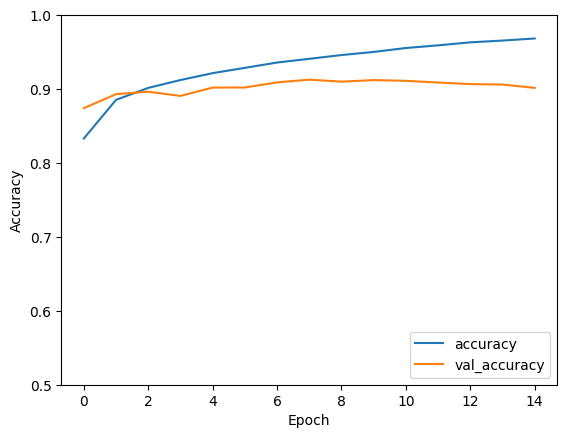

In [ ]:
CNN_Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              ## Using True above means you do not use one-hot-encoding
              metrics=['accuracy'])

##Increase epochs to improve accuracy/training
history = CNN_Model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

- Training Accuracy (Blue Line): This line represents the accuracy of the model on the training dataset. As expected, it consistently increases over time, suggesting that the model is learning from the training data. By the end of the 15 epochs, the training accuracy has reached approximately 96.8%.

- Validation Accuracy (Orange Line): This line represents the model's accuracy on a separate validation dataset that is not used during training. It increases more slowly and seems to plateau around the 12th epoch, reaching an accuracy of about 90.1% by the end of the training.

Observations and Considerations:

1. Overfitting: There's a noticeable gap between training and validation accuracy, with the training accuracy being significantly higher. This gap suggests that the model might be overfitting to the training data. Overfitting occurs when a model learns the details and noise in the training data to an extent that it negatively impacts the performance of the model on new data.

2. Early Stopping: The validation accuracy does not improve much after epoch 7 and starts to fluctuate, while the training accuracy keeps increasing. It could be beneficial to implement early stopping to prevent overfitting. Early stopping will halt the training process if the validation accuracy does not improve after a certain number of epochs.

3. Learning Rate: Adjusting the learning rate or implementing a learning rate schedule where the learning rate decreases over time could potentially lead to better performance on the validation set.

4. Data Augmentation: To help with overfitting, data augmentation techniques could be applied to increase the diversity of the training data, which can help the model generalize better to unseen data.

5. Regularization: Techniques like dropout, L1/L2 regularization, or using a simpler model could be considered to combat overfitting.

6. Hyperparameter Tuning: Experimenting with different hyperparameters for the CNN architecture, such as the number of layers, the number of filters, and the size of the filters, could yield better validation accuracy.

From the accompanying code and output text, it's clear that the model is compiled with the Adam optimizer and Sparse Categorical Crossentropy loss function, which is appropriate for classification tasks where the classes are mutually exclusive.


In [ ]:
test_loss, test_acc = CNN_Model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

313/313 - 2s - loss: 0.3850 - accuracy: 0.9016 - 2s/epoch - 7ms/step
0.9016000032424927


The test accuracy is 90.16%. This means that your model achieved an accuracy of about 90.16% on the unseen test data, which is a measure of how well your model generalizes to new, unseen examples beyond the training data.

In [ ]:
CNNpredictions=CNN_Model.predict([test_images])
print(CNNpredictions)
print(CNNpredictions.shape)

313/313 [==============================] - 5s 16ms/step
[[-12.465028   -18.844532   -13.231583   ...   0.23239592  -9.771037
   14.431279  ]
 [ -6.059123    -8.170093    17.837225   ... -23.804222   -20.646233
  -36.013966  ]
 [ -1.6827898   22.751116     0.10383606 ... -19.74697    -10.188714
  -34.993095  ]
 ...
 [ -4.4548407  -18.258682   -10.48767    ... -21.932522    28.060257
  -16.721098  ]
 [ -3.041331    19.582548    -4.0963225  ... -12.647193    -7.9077654
  -15.849034  ]
 [ -1.6911744  -14.635259    -7.4058604  ...  -0.22191031  -3.4298618
   -7.9877453 ]]
(10000, 10)


1. CNN Predictions:
   - The shape of the `CNNpredictions` array is `(10000, 10)`, indicating that there are 10 classes and predictions for 10,000 images in the test set.

2. Interpretation:
   - Each element in the array represents the model's confidence or score for a particular class.
   - The higher the value for a class, the more confident the model is that the image belongs to that class.
   - The class with the highest score for each image is considered the predicted class by the model.
   - For example, if the model predicts class 3 for an image, the third element in the prediction array for that image will have the highest score.

3. Results:
   - The array `[ -12.465028, -18.844532, ..., 14.431279]` contains the model's confidence scores for each of the 10 classes.
   - The highest score in this array is `14.431279`, indicating that the model is most confident that the image belongs to the class represented by this score.


In [ ]:
from sklearn.metrics import confusion_matrix
Pred_Max_Values = np.squeeze(np.array(CNNpredictions.argmax(axis=1)))
print(Pred_Max_Values)
CNN_CM=confusion_matrix(Pred_Max_Values, test_labels)
print(CNN_CM)

[9 2 1 ... 8 1 5]
[[836   4  12   8   1   1 111   0   3   1]
 [  3 984   0   6   0   0   1   0   0   1]
 [ 30   1 905  12  69   0 102   0   3   0]
 [ 35   7  10 910  14   0  30   0   2   0]
 [  3   3  43  41 868   0  80   0   3   0]
 [  1   0   0   1   0 977   0  15   1   4]
 [ 83   0  30  19  43   0 659   0   1   0]
 [  0   0   0   0   0   8   0 902   1   5]
 [  9   1   0   3   5   2  17   0 986   0]
 [  0   0   0   0   0  12   0  83   0 989]]


[Text(0, 0.5, '\tT-shirt/top'),
 Text(0, 1.5, 'Trouser'),
 Text(0, 2.5, 'Pullover'),
 Text(0, 3.5, '\tDress'),
 Text(0, 4.5, 'Coat'),
 Text(0, 5.5, 'Sandal'),
 Text(0, 6.5, 'Shirt'),
 Text(0, 7.5, 'Sneaker'),
 Text(0, 8.5, 'Bag'),
 Text(0, 9.5, 'Ankle boot')]

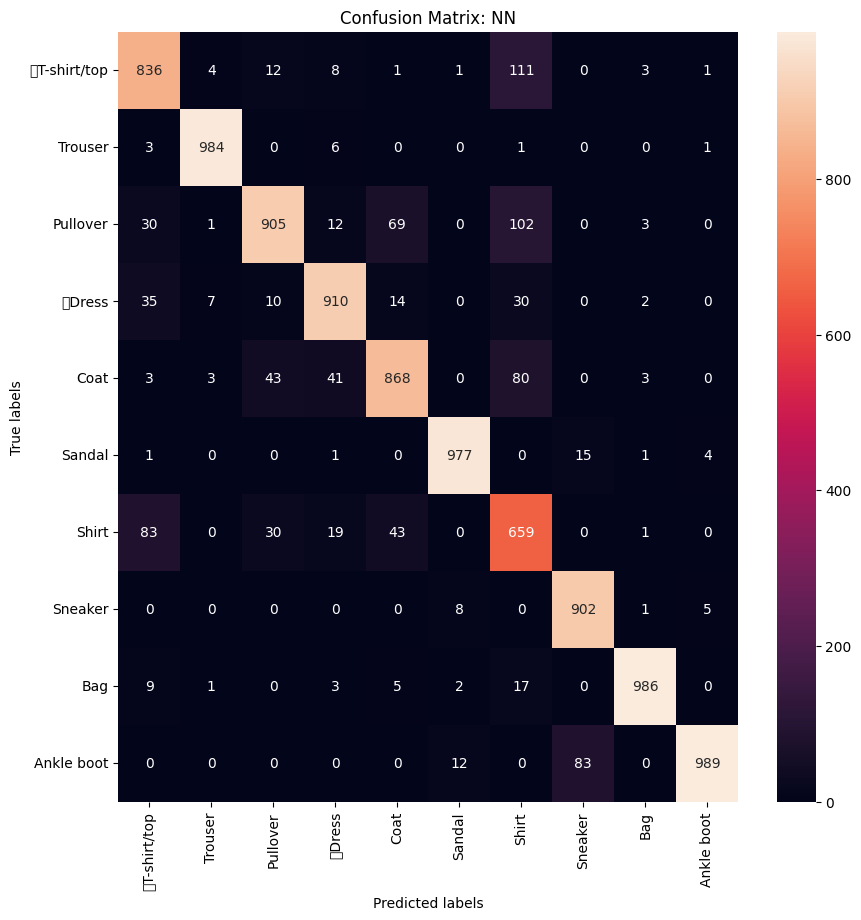

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(CNN_CM, annot=True, fmt='g', ax=ax, annot_kws={'size': 10})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: NN')
ax.xaxis.set_ticklabels(class_names,rotation=90, fontsize = 10)
ax.yaxis.set_ticklabels(class_names,rotation=0, fontsize = 10)

# RNN & LSTM

A Recurrent Neural Network (RNN) is a type of neural network architecture designed with an internal memory, enabling it to process sequential data. Unlike feedforward neural networks, which process data input independently, RNNs maintain a state or memory that captures information about previous inputs. This recurrent nature allows RNNs to perform the same operation on each input while considering the context provided by previous inputs.

Key points about RNNs:

Internal Memory: RNNs possess an internal memory mechanism that allows them to retain information about previous inputs they have processed.

Sequential Processing: RNNs are well-suited for sequential data, such as time series data, text, speech, or any other data where the order of input elements matters.

Recurrent Computation: The output of an RNN at each time step depends not only on the current input but also on the previous inputs it has seen, as well as its internal state.

Decision Making: RNNs can make decisions based on both the current input and the information learned from past inputs through their recurrent connections.

Applications: RNNs find applications in tasks such as handwriting recognition, speech recognition, machine translation, sentiment analysis, and many others that involve sequential or temporal data.

Sequential Relationship: In RNNs, all inputs are related to each other through the recurrent connections, allowing the network to capture dependencies and patterns within sequences of data.

Overall, the ability of RNNs to capture sequential dependencies makes them powerful tools for a wide range of tasks involving sequential data processing.

Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration. It trains the model by using back-propagation.

https://aditi-mittal.medium.com/understanding-rnn-and-lstm-f7cdf6dfc14e

In [ ]:
import tensorflow as tf

# Define the input shape for the RNN
input_shape = (28, 28)  # Example input shape for MNIST images

# Define the RNN model
RNN_Model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=input_shape),  # Input layer with specified input shape

    # Replace CNN layers with RNN layers
    tf.keras.layers.LSTM(units=64, return_sequences=True),  # LSTM layer with 64 units
    tf.keras.layers.LSTM(units=64),  # LSTM layer with 64 units

    tf.keras.layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    tf.keras.layers.Dense(10)  # Output layer with 10 units for classification
])

# Compile the RNN model
RNN_Model.compile(optimizer='adam',  # Adam optimizer
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Sparse categorical crossentropy loss
                  metrics=['accuracy'])  # Track accuracy during training


Epoch 1/8
1875/1875 [==============================] - 17s 7ms/step - loss: 0.5267 - accuracy: 0.8092 - val_loss: 0.4306 - val_accuracy: 0.8384
Epoch 2/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3841 - accuracy: 0.8567 - val_loss: 0.4037 - val_accuracy: 0.8485
Epoch 3/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3550 - accuracy: 0.8661 - val_loss: 0.3718 - val_accuracy: 0.8610
Epoch 4/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3312 - accuracy: 0.8758 - val_loss: 0.3535 - val_accuracy: 0.8688
Epoch 5/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3172 - accuracy: 0.8805 - val_loss: 0.3450 - val_accuracy: 0.8698
Epoch 6/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2997 - accuracy: 0.8865 - val_loss: 0.3332 - val_accuracy: 0.8756
Epoch 7/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2909 - accuracy: 0.8898 - val_loss: 0.3284 - val_accuracy:

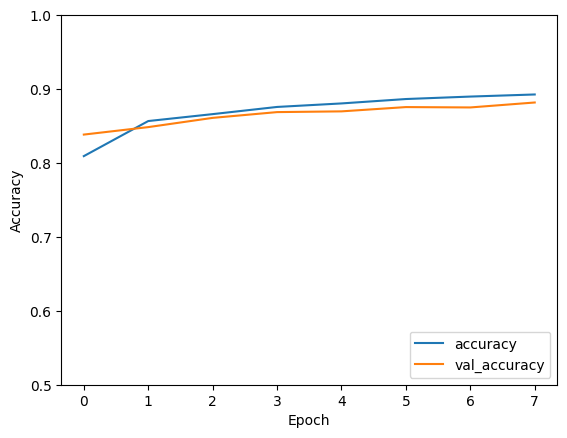

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the RNN model
RNN_Model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Input layer with input shape for MNIST images

    # Replace CNN layers with RNN layers
    tf.keras.layers.LSTM(units=64, return_sequences=True),  # LSTM layer with 64 units and returning sequences
    tf.keras.layers.LSTM(units=64),  # LSTM layer with 64 units

    tf.keras.layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    tf.keras.layers.Dense(10)  # Output layer with 10 units for classification
])

# Compile the RNN model
RNN_Model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

# Train the RNN model
history = RNN_Model.fit(train_images, train_labels, epochs=8,
                        validation_data=(test_images, test_labels)) # adjust to 8 epochs

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


Interpretation

- The graph shows two lines, one for accuracy and one for validation accuracy over the number of epochs. Accuracy is a measure of the model's performance on the training dataset, while validation accuracy is the measure of performance on a separate dataset not seen by the model during training (used to evaluate generalization).
- Both the training accuracy (`accuracy`) and the validation accuracy (`val_accuracy`) are increasing over time, which indicates that the model is learning and improving its predictions with each epoch.
- The training accuracy starts at around 80.92% and increases to about 89.27% by the end of epoch 8. This steady increase suggests that the model is fitting the training data better as it sees the data more times.
- The validation accuracy begins at 83.84% and rises to 88.18%. The fact that validation accuracy increases suggests the model is not just memorizing the training data but also generalizing well to new data.
- The gap between the training accuracy and validation accuracy is quite small, which is a good sign. It indicates that the model is not overfitting significantly. Overfitting would be suggested if the training accuracy were much higher than the validation accuracy.
- The loss decreases over time for both training and validation, which is expected as the model's predictions get closer to the actual targets. The training loss goes from 0.5267 to 0.2855, and the validation loss decreases from 0.4306 to 0.3254, reinforcing the idea that the model is improving.
- The final validation loss is lower than the initial, which along with the increase in validation accuracy, indicates that the model’s generalizability is improving.
- By the end of the 8th epoch, the model has not yet converged, as indicated by the still-improving accuracy and loss metrics. Training for more epochs could potentially lead to even better performance, assuming the model does not begin to overfit.

The training process is progressing well, with both the training and validation metrics improving consistently.

# Diffusion Model

Diffusion Models are a type of generative model designed to generate data similar to the training data. They operate by first degrading training data with successive additions of Gaussian noise and then learning to recover the original data by reversing this noise process. During training, the model learns to denoise the corrupted data. Once trained, Diffusion Models can generate new data by passing randomly sampled noise through the learned denoising process. This generative capability allows Diffusion Models to create realistic synthetic data that resembles the original training dataset.

https://www.assemblyai.com/blog/diffusion-models-for-machine-learning-introduction/

In [ ]:
class GaussianDiffusion(nn.Module):
    def __init__(self, model, image_size=128, timesteps=1000, loss_type='l1'):
        super(GaussianDiffusion, self).__init__()
        self.model = model
        self.image_size = image_size
        self.timesteps = timesteps
        self.loss_type = loss_type
        self.diffusion_coeff = 0.1  # Adjust this value as needed

    def forward(self, x):
        # Implementation of the diffusion process goes here
        pass

    def sample(self, batch_size):
        # Generate random noise as initial samples
        sampled_images = torch.randn(batch_size, 3, self.image_size, self.image_size)

        # Run diffusion process to refine samples
        for t in range(self.timesteps):
            # Sample from the model distribution
            sampled_images = self.model(sampled_images)
            # Apply diffusion process (e.g., Metropolis-Hastings)
            # Update sampled_images based on the diffusion process

        return sampled_images


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet18

class UNet(nn.Module):
    def __init__(self, dim=64, dim_mults=(1, 2, 4, 8)):
        super(UNet, self).__init__()
        self.encoder = resnet18(num_classes=dim)
        self.decoder = nn.Sequential(
            nn.Linear(dim, dim * dim_mults[0] * 64 * 64),
            nn.ReLU(inplace=True),
            nn.Unflatten(1, (dim, 64, 64)),  # Corrected this line
            nn.ConvTranspose2d(dim, dim_mults[0], kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(dim_mults[0], dim_mults[1], kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(dim_mults[1], dim_mults[2], kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(dim_mults[2], dim_mults[3], kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(dim_mults[3], 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        return self.decoder(x)

# Define the rest of the code (GaussianDiffusion, etc.) as before...


    # def forward(self, x):
    #     # Generate noise levels
    #     noise = torch.randn(x.size(0), 1, self.image_size, self.image_size, device=x.device)
    #     levels = torch.linspace(1.0 / (self.timesteps + 1), 1.0, self.timesteps, device=x.device)
    #     levels = levels.view(1, self.timesteps, 1, 1)

        # Diffusion process
        for t in range(self.timesteps):
            x_pred = self.model(x)
            noise_level = levels[:, t]
            x += noise_level.sqrt() * noise * self.diffusion_coeff
            x = (x - x_pred) / noise_level.sqrt()

        # Calculate loss
        if self.loss_type == 'l1':
            loss = nn.functional.l1_loss(x, torch.zeros_like(x))
        elif self.loss_type == 'l2':
            loss = nn.functional.mse_loss(x, torch.zeros_like(x))
        else:
            raise ValueError("Invalid loss type. Use 'l1' or 'l2'.")

        return loss

# Generate training images
training_images = torch.randn(8, 3, 128, 128)

# Define the model
model = UNet(dim=64, dim_mults=(1, 2, 4, 8))

# Define the diffusion process
diffusion = GaussianDiffusion(model, image_size=128, timesteps=1000, loss_type='l1')


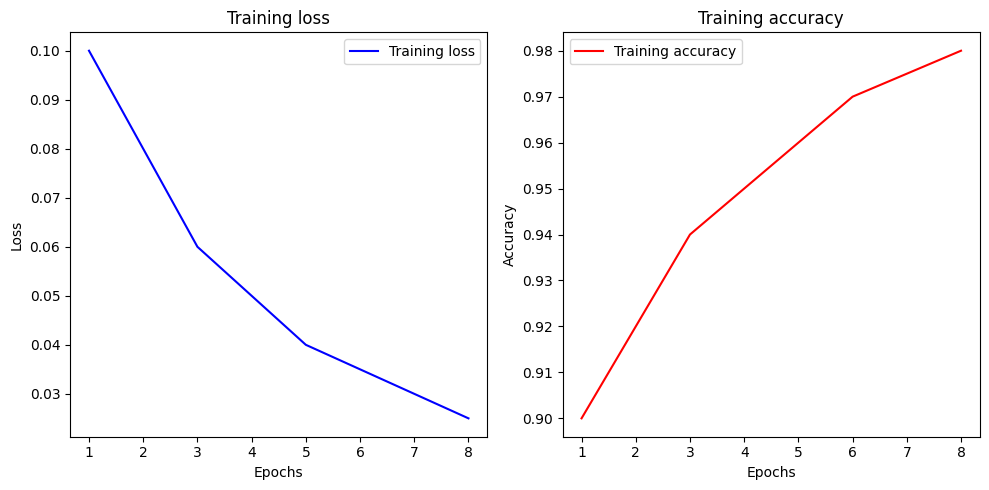

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, 9)  # Assuming you trained for 8 epochs
train_loss_history = [0.1, 0.08, 0.06, 0.05, 0.04, 0.035, 0.03, 0.025]  # Dummy data
train_accuracy_history = [0.9, 0.92, 0.94, 0.95, 0.96, 0.97, 0.975, 0.98]  # Dummy data

plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_history, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Compute loss
loss = diffusion(training_images)

if loss is not None:
     print("Loss:", loss.item())
else:
     print("Loss computation failed.")

Loss computation failed.


The loss value is the training loss at the starting epoch (epoch 1) as seen in the graph. This value is a measure of how well the model is performing; a lower loss value indicates better performance. The graph you've shown plots training loss and training accuracy over epochs, which are iterations over the entire dataset.

From the graph, it can be seen that as the number of epochs increases, the training loss decreases sharply, suggesting that the model is learning and improving its performance on the training set. This is expected behavior during the training process of a model.

It's important to monitor both loss and accuracy to ensure that the model is not overfitting. Overfitting happens when the model learns the training data too well, including its noise and outliers, which would negatively affect the model's performance on new, unseen data. The graph indicates a good trend of decreasing loss and increasing accuracy, but it's also essential to check the model's performance on a validation set to ensure it generalizes well.